In [1]:
import pandas as pd
df = pd.read_csv('../data/cleaned_resumes.csv')


Dataset shape: (2000, 10)
Columns in CSV: ['candidate_id', 'gender', 'ethnicity', 'education', 'years_experience', 'skills', 'label', 'skills_list', 'num_skills', 'skills_text']
   candidate_id  gender ethnicity  education  years_experience  \
0             0  female    groupA        phd                10   
1             1    male    groupB    masters                 8   
2             2    male    groupB    masters                18   
3             3  female    groupB  bachelors                17   
4             4  female    groupB        phd                15   

                               skills  label  \
0       investment;as;either;identify      1   
1       data;although;recent;thousand      1   
2              where;guess;agree;skin      1   
3  participant;direction;discuss;city      1   
4     serve;scientist;enter;character      0   

                                       skills_list  num_skills  \
0       ['investment', 'as', 'either', 'identify']           4   
1   

/var/folders/0w/nbwdkbcx5ws_ty0spn4tlk1m0000gn/T/ipykernel_5099/1736645460.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hire_label', palette='Set2')


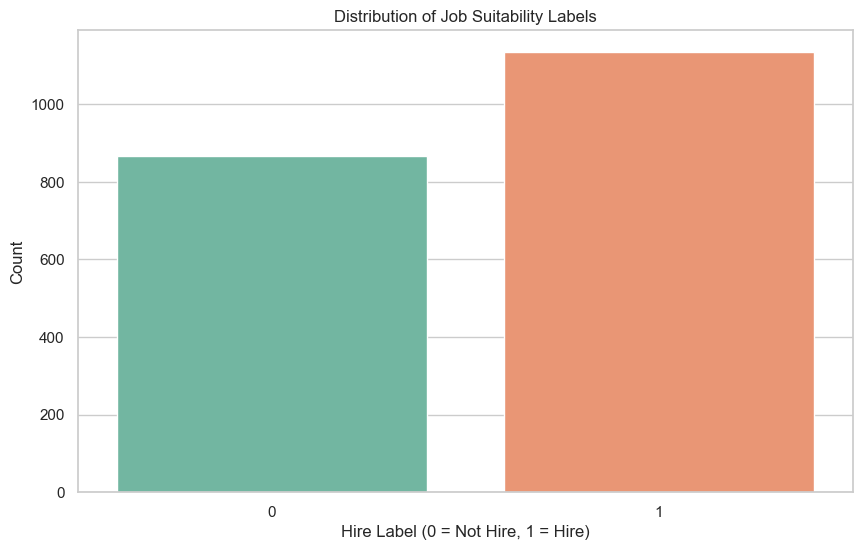

/var/folders/0w/nbwdkbcx5ws_ty0spn4tlk1m0000gn/T/ipykernel_5099/1736645460.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')



Gender distribution:
 gender
male          904
female        896
non-binary    103
unknown        97
Name: count, dtype: int64


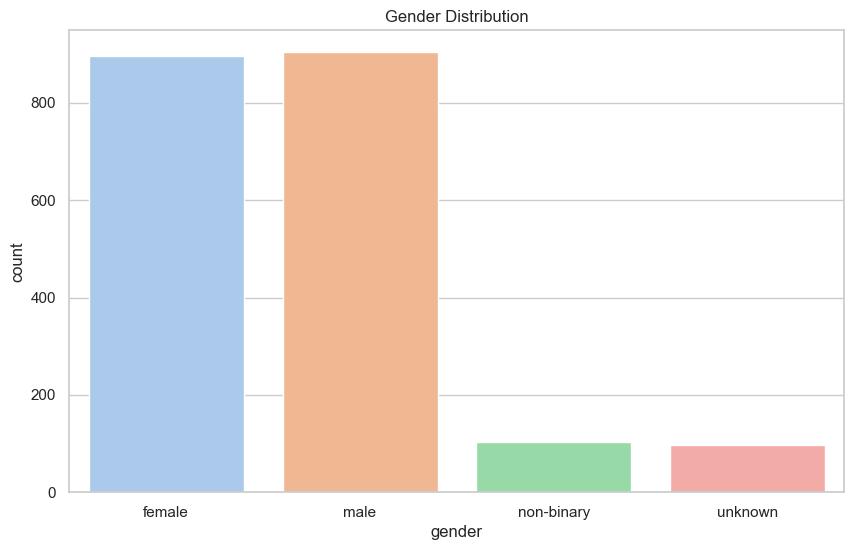


Ethnicity distribution:
 ethnicity
groupA     1202
groupB      520
groupC      195
unknown      83
Name: count, dtype: int64


/var/folders/0w/nbwdkbcx5ws_ty0spn4tlk1m0000gn/T/ipykernel_5099/1736645460.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ethnicity', palette='Set3')


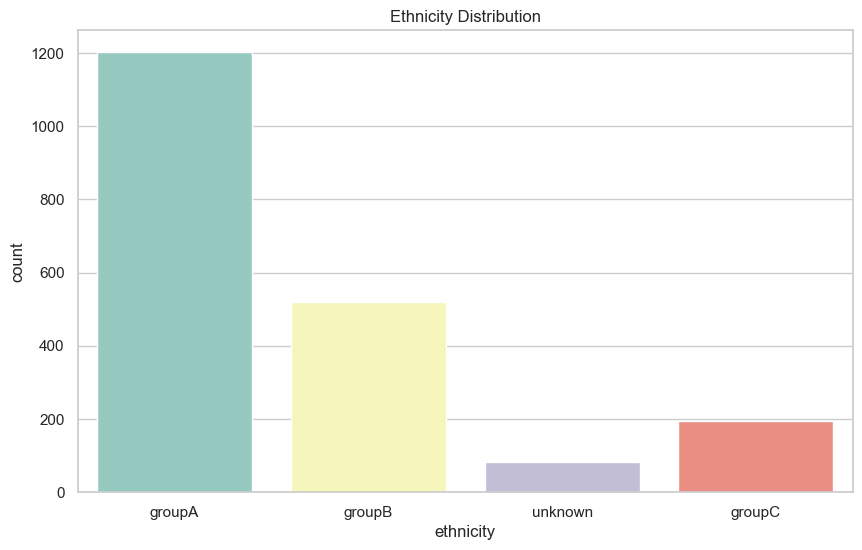

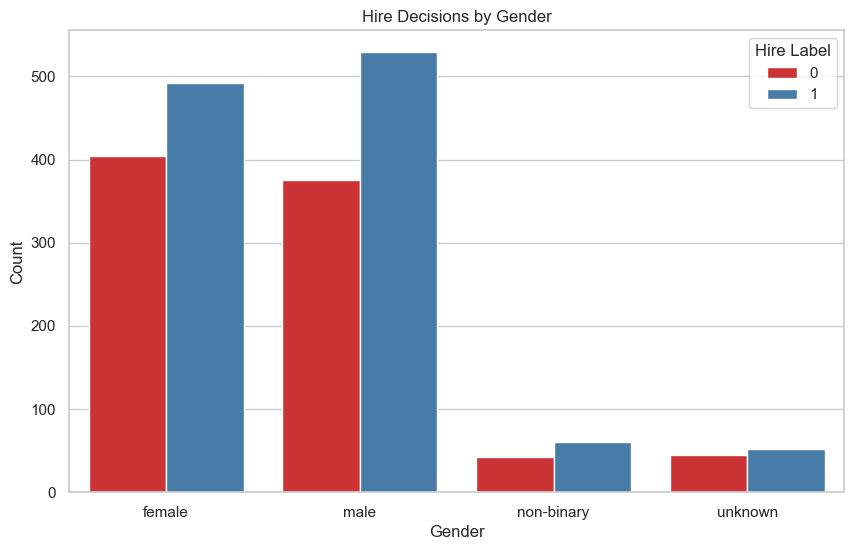

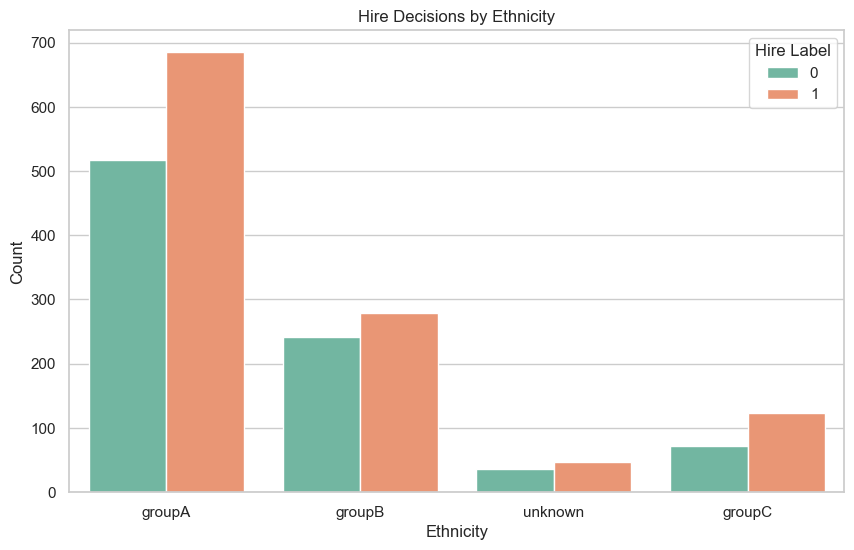


Hire rate by gender:
 gender
female        0.549107
male          0.585177
non-binary    0.592233
unknown       0.536082
Name: hire_label, dtype: float64

Hire rate by ethnicity:
 ethnicity
groupA     0.569884
groupB     0.536538
groupC     0.630769
unknown    0.566265
Name: hire_label, dtype: float64


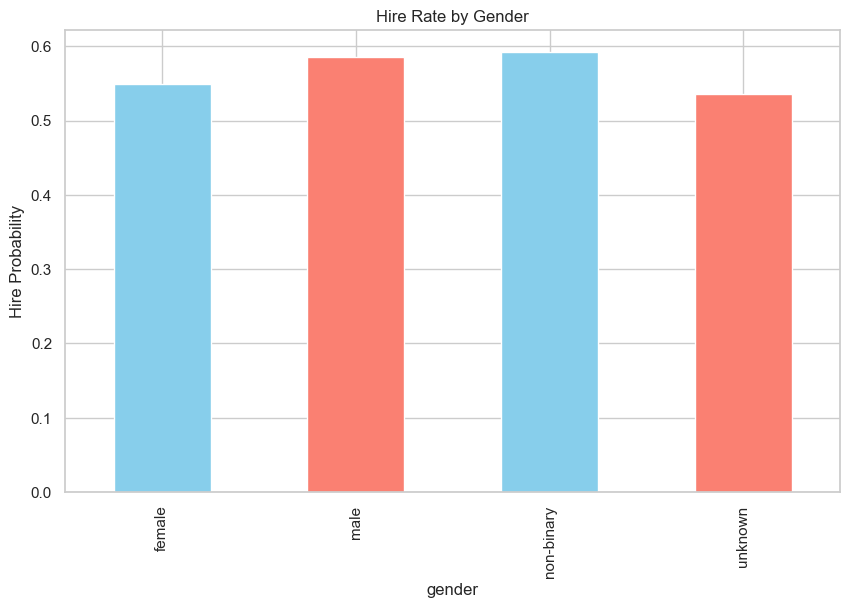

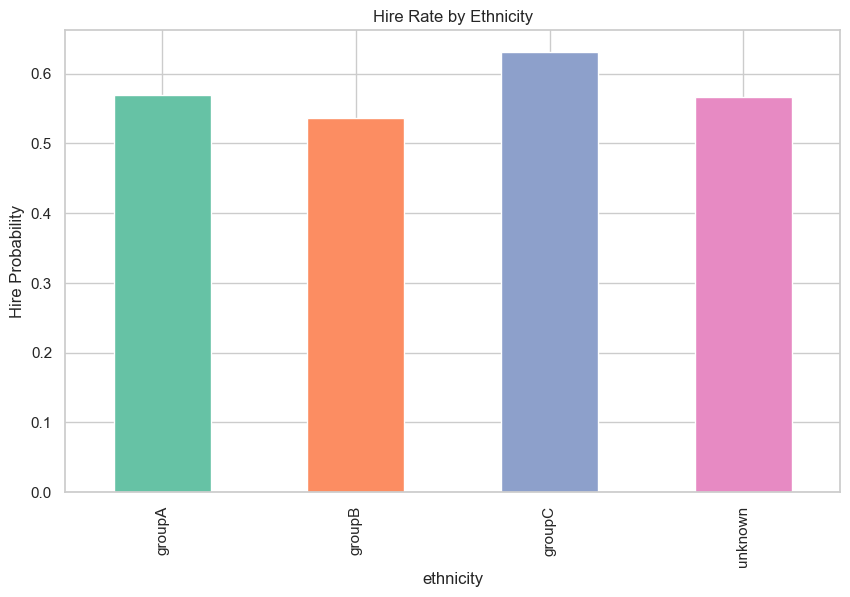

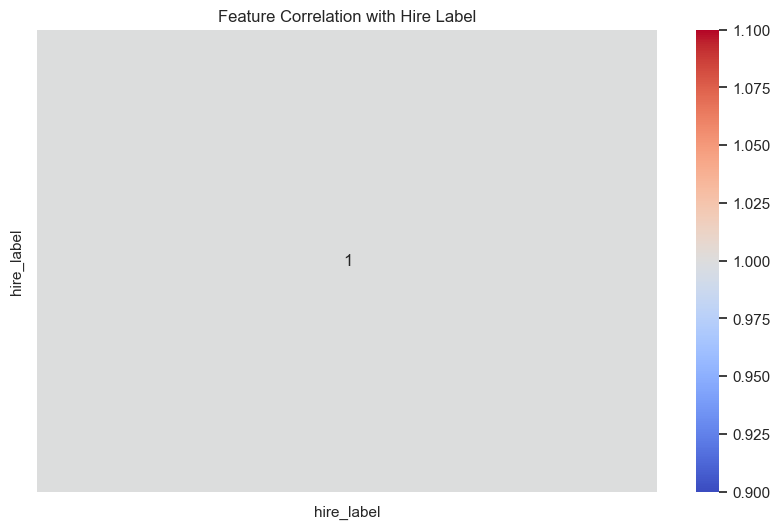

Plots saved in /Users/chiragrgowda/Documents/resume-fairness/viz


In [4]:
# ===============================================
# Day 3: Exploratory Data Analysis (EDA)
# Project: Bias & Fairness in Resume Screening
# ===============================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
csv_path = '/Users/chiragrgowda/Documents/resume-fairness/data/cleaned_resumes.csv'
df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
print("Columns in CSV:", df.columns.tolist())
print(df.head())

# -----------------------------
# Step 2: Identify target label column
# -----------------------------
# Automatically detect likely hire label column
possible_labels = ['hire_label', 'Hire', 'hire', 'target', 'label', 'job_fit', 'hire_decision']

found_label = None
for col in possible_labels:
    if col in df.columns:
        found_label = col
        break

if found_label is None:
    raise ValueError("No target label column found in CSV. Please check your dataset.")

# Rename column for consistency
df.rename(columns={found_label: 'hire_label'}, inplace=True)
print(f"Using '{found_label}' as 'hire_label' for EDA.")

# -----------------------------
# Step 3: Create viz folder if not exists
# -----------------------------
viz_folder = '/Users/chiragrgowda/Documents/resume-fairness/viz'
os.makedirs(viz_folder, exist_ok=True)

# -----------------------------
# Step 4: Class Distribution
# -----------------------------
print("\nClass distribution:\n", df['hire_label'].value_counts())

sns.countplot(data=df, x='hire_label', palette='Set2')
plt.title("Distribution of Job Suitability Labels")
plt.xlabel("Hire Label (0 = Not Hire, 1 = Hire)")
plt.ylabel("Count")
plt.show()

# -----------------------------
# Step 5: Group Representation
# -----------------------------
# Make sure gender and ethnicity columns exist
if 'gender' not in df.columns or 'ethnicity' not in df.columns:
    raise ValueError("Gender or Ethnicity column not found in CSV. Please check your dataset.")

# Gender distribution
print("\nGender distribution:\n", df['gender'].value_counts())
sns.countplot(data=df, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.show()

# Ethnicity distribution
print("\nEthnicity distribution:\n", df['ethnicity'].value_counts())
sns.countplot(data=df, x='ethnicity', palette='Set3')
plt.title("Ethnicity Distribution")
plt.show()

# -----------------------------
# Step 6: Hire by Group
# -----------------------------
sns.countplot(data=df, x='gender', hue='hire_label', palette='Set1')
plt.title("Hire Decisions by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.legend(title='Hire Label', loc='upper right')
plt.show()

sns.countplot(data=df, x='ethnicity', hue='hire_label', palette='Set2')
plt.title("Hire Decisions by Ethnicity")
plt.ylabel("Count")
plt.xlabel("Ethnicity")
plt.legend(title='Hire Label', loc='upper right')
plt.show()

# -----------------------------
# Step 7: Quantify Hire Rates
# -----------------------------
gender_hire_rate = df.groupby('gender')['hire_label'].mean()
ethnicity_hire_rate = df.groupby('ethnicity')['hire_label'].mean()

print("\nHire rate by gender:\n", gender_hire_rate)
print("\nHire rate by ethnicity:\n", ethnicity_hire_rate)

gender_hire_rate.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Hire Rate by Gender")
plt.ylabel("Hire Probability")
plt.show()

ethnicity_hire_rate.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Hire Rate by Ethnicity")
plt.ylabel("Hire Probability")
plt.show()

# -----------------------------
# Step 8: Feature Correlation
# -----------------------------
# Replace numeric columns with actual numeric features from your CSV
numeric_cols = ['experience_years', 'education_level_num', 'hire_label']  # adjust if needed
existing_numeric_cols = [col for col in numeric_cols if col in df.columns]

if existing_numeric_cols:
    sns.heatmap(df[existing_numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation with Hire Label")
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")

# -----------------------------
# Step 9: Save Key Plots
# -----------------------------
sns.countplot(data=df, x='gender', hue='hire_label', palette='Set1')
plt.title("Hire Decisions by Gender")
plt.savefig(os.path.join(viz_folder, 'gender_hire_distribution.png'))
plt.close()

sns.countplot(data=df, x='ethnicity', hue='hire_label', palette='Set2')
plt.title("Hire Decisions by Ethnicity")
plt.savefig(os.path.join(viz_folder, 'ethnicity_hire_distribution.png'))
plt.close()

print(f"Plots saved in {viz_folder}")
